<a href="https://colab.research.google.com/github/AJ-Abisola/NLP-Project/blob/Yelp/NLP_Yelp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Project

*By AJ ABISOLA*

In this NLP project, I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.


**DATA**

Data from the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013) will be used.

Each observation in this dataset is a real review of a particular business by a particular user.


The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. In other words, it is the rating of the business by the client who wrote the review.


The "cool" column shows the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.


The "useful" and "funny" columns are similar to the "cool" column.


Let's get started!

In [3]:
import numpy as np
import pandas as pd

## The Data

*Reading in the Data and checking the general info about it*

In [4]:
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
#The length of a review can give us more information about it, so a column with length is needed.
yelp['text length'] = yelp['text'].apply(len)

# EDA

*Let's explore the data*

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

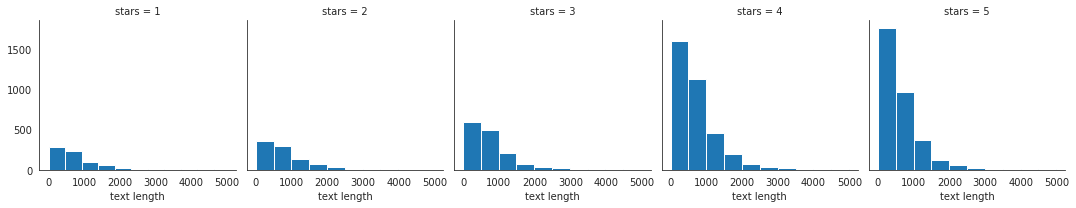

In [10]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

Text(0.5, 1.0, 'Boxplot of ratings per text length')

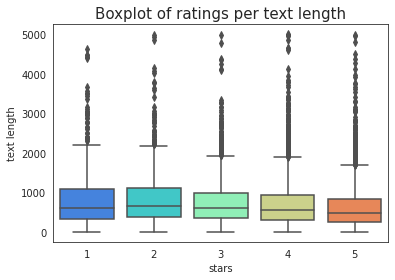

In [11]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')
plt.title('Boxplot of ratings per text length', fontdict={'size':15})

*It can be seen that most of the ratings tend to have a text length within the range of 1000. Let's explore this further.*

Text(0.5, 1.0, 'Countplot of ratings')

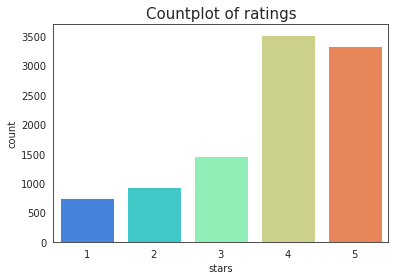

In [12]:
sns.countplot(x='stars',data=yelp,palette='rainbow')
plt.title('Countplot of ratings', fontdict={'size':15})

*It can be seen that both 4 star and 5 star ratings are the most common*

In [13]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


*Another inference is that, even though 4 and 5 stars are more common, higher ratings have a smaller average text length than lesser ratings*

In [14]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


Text(0.5, 1.0, 'Features Correlation map')

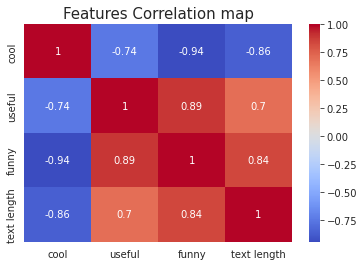

In [15]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)
plt.title('Features Correlation map', fontdict={'size':15})

*There is a good correlation between funny and useful, which indicates a funny review can actually also be useful. The same is applicable to funny and text length. Text length also has a nice correlattion with useful votes too.*

## NLP Classification Task

*Since i am only trying to predict 1 star and 5 stars ratings, i will grab reviews that were either 1 star or 5 stars into a new dataframe.*

In [16]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [17]:
X = yelp_class['text']
y = yelp_class['stars']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [19]:
X = cv.fit_transform(X)

## Train Test Split

*Let's split our data into training and testing data.*

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

*Time to train a model!*
*An instance of Multinomial Naive Bayes is created and fitted to the training data*

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [23]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [24]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# ALL RATINGS

*Lets check for all ratings, instead of just 1 and 5 stars.*

In [27]:
X1 = yelp['text']
y1 = yelp['stars']

In [28]:
X1 = cv.fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.3,random_state=101)

In [29]:
nb1 = MultinomialNB()

In [30]:
nb.fit(X1_train,y1_train)

MultinomialNB()

In [31]:
predictions1 = nb.predict(X1_test)

In [32]:
print(confusion_matrix(y1_test,predictions1))
print('\n')
print(classification_report(y1_test,predictions1))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



# Using a Pipeline

*Lets see if a pipeline can improve and give a better model*

In [33]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [36]:
X_pipe = yelp['text']
y_pipe = yelp['stars']

In [37]:
Xpipe_train, Xpipe_test, ypipe_train, ypipe_test = train_test_split(X_pipe, y_pipe,test_size=0.3,random_state=101)

In [38]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [39]:
pipeline.fit(Xpipe_train,ypipe_train )

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [41]:
predictions_pipeline = pipeline.predict(Xpipe_test)

In [42]:
print(confusion_matrix(y1_test,predictions_pipeline))
print('\n')
print(classification_report(y1_test,predictions_pipeline))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       1.00      0.00      0.00       443
           4       0.38      0.92      0.54      1064
           5       0.66      0.29      0.40      1000

    accuracy                           0.42      3000
   macro avg       0.41      0.24      0.19      3000
weighted avg       0.50      0.42      0.33      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

*Our model did good in the first case. However, in predicting all ratings, the performance was low, and using pipelines didnt improve it. We were also able to infer that review ratings have an inverse relationship with the length of the review.*